# How to measure stellar radial velocities
This is a tutorial to the `laspec.ccf` module.

`RVM` dump file can be donwloaded [here](http://paperdata.china-vo.org/bozhang/rvzp/v10_rvm.dump).

A demo spectrum `fits` file can be downloaded [here](http://paperdata.china-vo.org/bozhang/rvzp/med-58415-TD062610N184524B01_sp08-037.fits.gz).

In [1]:
%pylab inline
rcParams["font.size"] = 20

Populating the interactive namespace from numpy and matplotlib


## read MRS fits file

In [2]:
from laspec.mrs import MrsFits
mf = MrsFits("/Users/cham/PycharmProjects/laspec/laspec/data/sb2demo/med-58415-TD062610N184524B01_sp08-037.fits.gz")
mf

No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Information    1 PrimaryHDU      91   ()      
  1  COADD_B       1 BinTableHDU     44   3780R x 5C   [E, E, E, I, I]   
  2  COADD_R       1 BinTableHDU     44   3922R x 5C   [E, E, E, I, I]   
  3  B-84117836    1 BinTableHDU     42   4136R x 4C   [E, E, E, I]   
  4  B-84117860    1 BinTableHDU     42   4136R x 4C   [E, E, E, I]   
  5  B-84117883    1 BinTableHDU     42   4136R x 4C   [E, E, E, I]   
  6  B-84117907    1 BinTableHDU     42   4136R x 4C   [E, E, E, I]   
  7  R-84117836    1 BinTableHDU     42   4136R x 4C   [E, E, E, I]   
  8  R-84117860    1 BinTableHDU     42   4136R x 4C   [E, E, E, I]   
  9  R-84117883    1 BinTableHDU     42   4136R x 4C   [E, E, E, I]   
 10  R-84117907    1 BinTableHDU     42   4136R x 4C   [E, E, E, I]   

## get all epochs

Text(0.5, 1.0, 'Red arm')

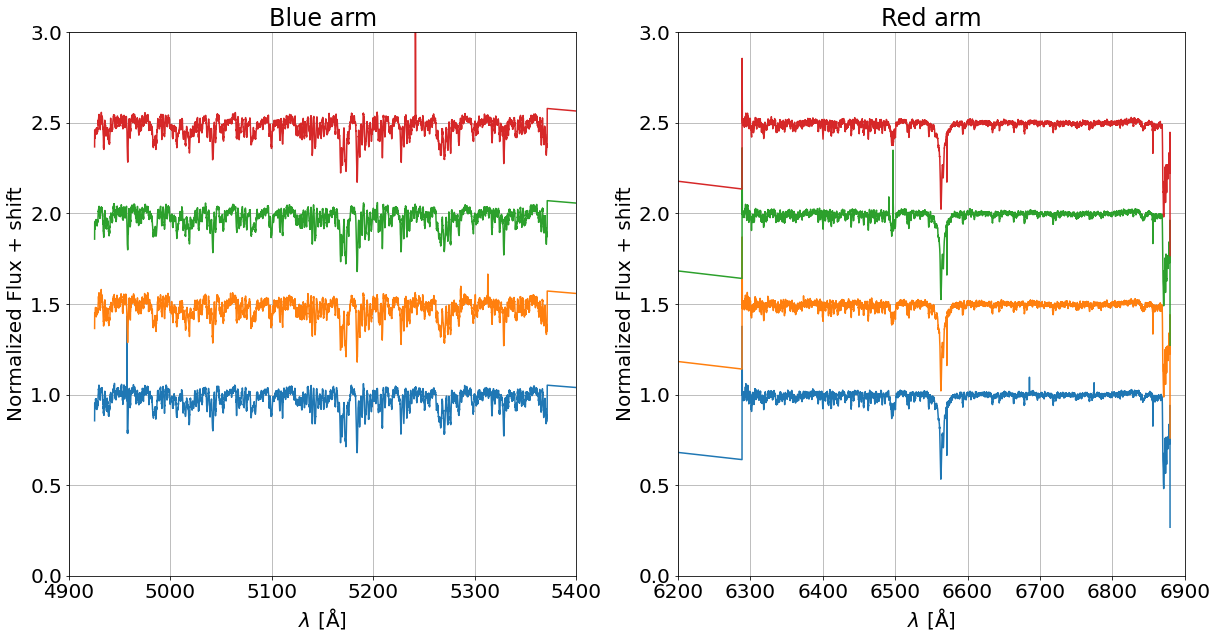

In [3]:
mes = mf.get_all_epochs(norm_type="spline", niter=3)

# plot the spectra
fig, axs = subplots(1,2,figsize=(20, 10))
plt.sca(axs[0])
for i,me in enumerate(mes):
    me.plot_norm(i*.5)
grid(True)
xlabel("$\\lambda~[\\mathrm{\AA}]$")
ylabel("Normalized Flux + shift")
xlim(4900,5400)
ylim(0, 3)
title("Blue arm")

plt.sca(axs[1])
for i,me in enumerate(mes):
    me.plot_norm(i*.5)
grid(True)
xlabel("$\\lambda~[\\mathrm{\AA}]$")
ylabel("Normalized Flux + shift")
xlim(6200,6900)
ylim(0, 3)
title("Red arm")

## reduce: remove cosmic rays

Text(0.5, 1.0, 'Red arm')

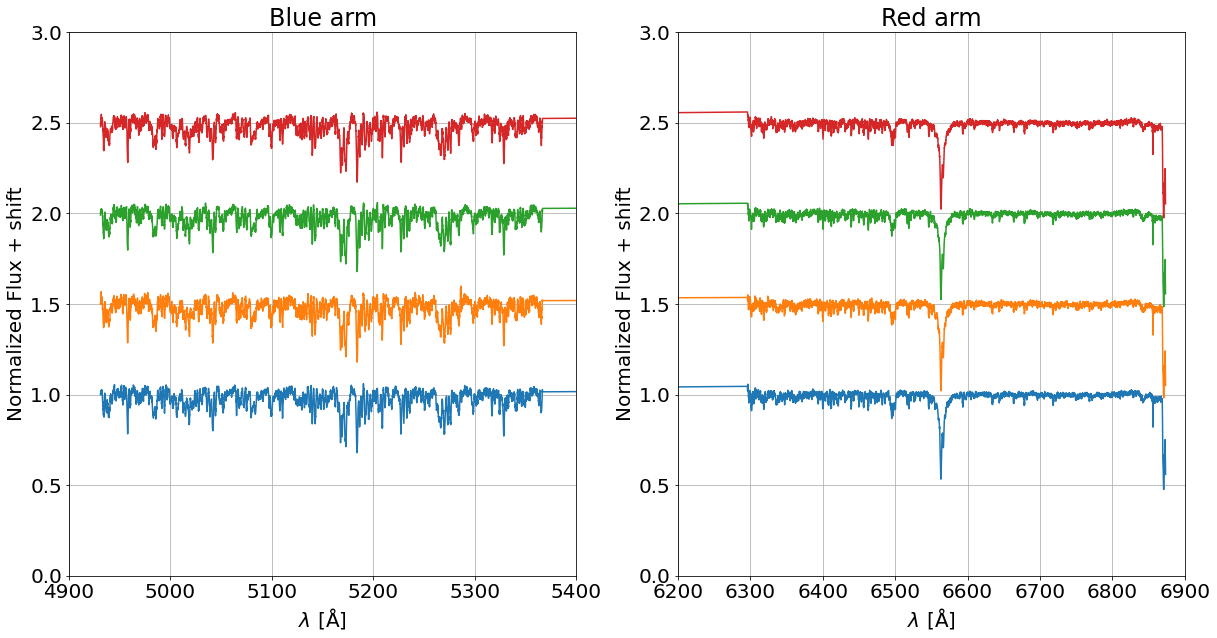

In [4]:
# get all epochs
mes = [_.reduce() for _ in mf.get_all_epochs(norm_type="spline", niter=3)]

# plot the spectra
fig, axs = subplots(1,2,figsize=(20, 10))
plt.sca(axs[0])
for i,me in enumerate(mes):
    me.plot_norm(i*.5)
grid(True)
xlabel("$\\lambda~[\\mathrm{\AA}]$")
ylabel("Normalized Flux + shift")
xlim(4900,5400)
ylim(0, 3)
title("Blue arm")

plt.sca(axs[1])
for i,me in enumerate(mes):
    me.plot_norm(i*.5)
grid(True)
xlabel("$\\lambda~[\\mathrm{\AA}]$")
ylabel("Normalized Flux + shift")
xlim(6200,6900)
ylim(0, 3)
title("Red arm")

## a demo spectrum `msr`

Text(0, 0.5, 'Normalized Flux')

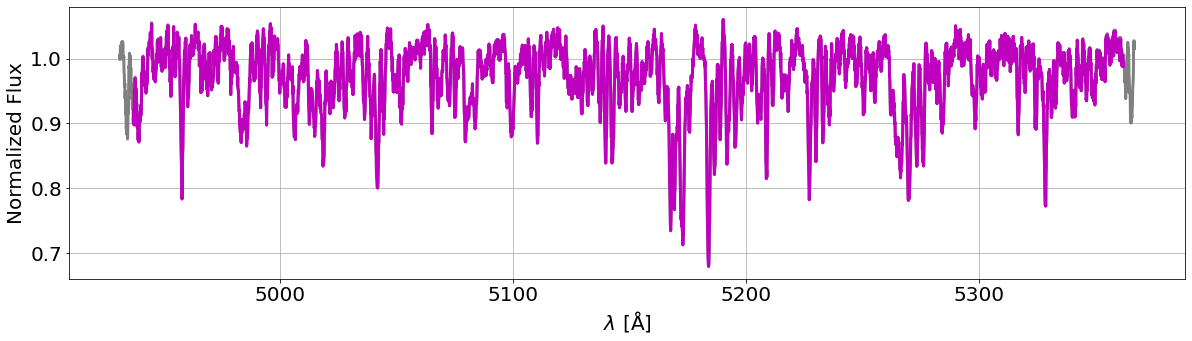

In [5]:
ms = mes[0].speclist[0]
msr = ms.reduce()
figure(figsize=(20, 5))
plot(ms.wave,ms.flux_norm, '-', c="gray", lw=3)
plot(msr.wave,msr.flux_norm, '-', c="m", lw=3)
grid(True)
xlabel("$\\lambda~[\\mathrm{\AA}]$")
ylabel("Normalized Flux")

# load `RVM`

In [6]:
import joblib
rvm = joblib.load("/Users/cham/projects/sb2/data/v10_rvm.dump")
rvm

<RVM [nmod=660] [4500.1<lambda<7199.9]>

In [7]:
rvm = rvm.shrink(100)
rvm

@RVM: initializing Radial Velocity Machine (RVM)...


<RVM [nmod=100] [4500.1<lambda<7199.9]>

# measure RV of `msr`

In [8]:
rvr = rvm.measure(msr.wave, msr.flux_norm, rv_grid=np.arange(-1000, 1000, 10))
rvr

{'rv_opt': -65.71504982050229,
 'rv_err': 1284.5538825841259,
 'rv_best': -70,
 'ccfmax': 0.8543042660054776,
 'success': True,
 'imod': 39,
 'pmod': array([ 5.33045431e+03,  3.00196446e+00, -8.23387820e-01, -1.18289656e-01]),
 'status': 0}

# measure RV with Monte Carlo error

In [9]:
rvr = rvm.measure(msr.wave, msr.flux_norm, flux_err=msr.flux_norm_err, nmc=100, rv_grid=np.arange(-1000, 1000, 10))
rvr

{'rv_opt': -65.71504982050229,
 'rv_err': 1284.5538825841259,
 'rv_best': -70,
 'ccfmax': 0.8543042660054776,
 'success': True,
 'imod': 39,
 'pmod': array([ 5.33045431e+03,  3.00196446e+00, -8.23387820e-01, -1.18289656e-01]),
 'status': 0,
 'rv_pct': array([-65.859978  , -65.71652257, -65.58214729])}

# explanation
- rv_opt: optimized measurement of RV
- rv_err: formal error from BFGS algorithm (do not use this)
- rv_best: the best rv at grid
- ccfmax: the maximum CCF value (corresponding to rv_opt)
- success: True if converged
- imod: the index of the best-match template
- pmod: the parameters of the best-match template
- status: 0 if success
- rv_pct: the 16, 50 and 84 percentiles of the Monte Carlo results

# measure SB2

In [10]:
rvr = rvm.measure_binary(msr.wave, msr.flux_norm, flux_err=msr.flux_norm_err, nmc=100, rv_grid=np.arange(-1000, 1000, 10),
                         twin=True, eta_init=0.3, eta_lim=(0, 2))
rvr

/Users/cham/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


OrderedDict([('rv1', -65.71504982050229),
             ('rv1_pct', array([-65.85634529, -65.69424725, -65.57854804])),
             ('rv1_err', 0.13889862362773187),
             ('ccfmax1', 0.8543042660054776),
             ('rv1_best', -70),
             ('imod1', 39),
             ('pmod1',
              array([ 5.33045431e+03,  3.00196446e+00, -8.23387820e-01, -1.18289656e-01])),
             ('imod2', 39),
             ('pmod2',
              array([ 5.33045431e+03,  3.00196446e+00, -8.23387820e-01, -1.18289656e-01])),
             ('success1', True),
             ('ccfmax2', 0.9428025720709089),
             ('success2', True),
             ('rv1_rv2_eta0',
              array([-65.71504982,  95.        ,   0.3       ])),
             ('rv1_rv2_eta',
              array([-65.47101649,  92.6106792 ,   0.47830922])),
             ('rv1_rv2_eta_pct',
              array([[-65.55617642,  92.41304153,   0.47585426],
                     [-65.45627069,  92.60053495,   0.47877978],
    

## explanation

### measurements assuming single star
- rv1: optimized measurement of RV
- rv1_pct: the 16, 50 and 84 percentiles of the Monte Carlo results
- rv1_err: the 16, 50, 84 percentiles of the MC results
- ccfmax1: the maximum CCF value
- rv_best: the best rv at grid
- imod1: the index of the best-match template
- pmod1: the parameters of the best-match template
- success1: True if converged
- status2: 0 if success

### measurements assuming binary
- ccfmax2: the maximum CCF value
- rv1_rv2_eta0: initial guess of the vector (rv1, rv2, luminosity_ratio)
- rv1_rv2_eta: the optimal solution
- rv1_rv2_eta_pct: the 16, 50, 84 percentiles of the MC results
- rv1_rv2_eta_err: the error derived from rv1_rv2_eta_pct
- success2: True if converged
- status2: 0 if success
- imod2: the index of the best-match template
- pmod2: the parameters of the best-match template

**Note that, if *twin* is set to True, I assume the spectrum of the secondary star is similar to that of the primary.**

## PS: if you make use of this code in your research, please cite Zhang et al. (in prep.)